In [436]:
import sys
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
np.set_printoptions(threshold=sys.maxsize)

# Input Parameters

Di bawah ini adalah parameter yang digunakan dalam ray tracing pada medium dengan gradien kecepatan konstan.

In [437]:
rays = 1 # jumlah ray

inc_z = 1 # increment nilai kedalaman
z        = np.array([1000]) # ketebalan medium
velo_i   = np.array([4000]) # kecepatan awal V0
velo_f   = np.array([2000]) # kecepatan akhir V(z)
layers = np.shape(z)[0]

depth = np.zeros([1, layers+1])
for i in range(1, layers + 1):
    depth[0, 0] = 0
    depth[0, i] = depth[0, i - 1] + z[i - 1]

# pembuatan matriks kedalaman
dz = np.zeros([1, 1])
for i in range(layers):
    a = np.transpose(np.amax(dz) + np.array([np.arange(1, z[i]+1, inc_z)]))
    dz = np.append(dz, a, axis = 0)

# Gradient & Slowness Vector Components

Besar kecepatan medium mengikuti persamaan:
$$
V(z) = V_{0} + bz
$$
Dengan menggunakan persamaan di atas, nilai gradien ($b$) adalah:
$$
b = \frac{V(z) - V_{0}}{z}
$$
dimana $V(z)$ adalah kecepatan medium pada titik $z$, $V_{0}$ adalah kecepatan pada titik awal, dan $z$ adalah jarak atau ketebalan medium. Di bawah ini adalah perhitungan nilai gradien $b$:

In [438]:
b = np.zeros([1, layers])
for i in range(layers):
    b[0, i] = (velo_f[i] - velo_i[i]) / z[i]

Perhitungan dilakukan pada bidang $(x, z)$ dengan $y = 0$ sehingga komponen vektor slowness arah y ($p_{y}$) bernilai 0. Medium memiliki velocity homogen secara lateral sehingga:
$$
p_{x} = p = \sin{i(z)}/V(z)
$$
dimana $i$ adalah sudut takeoff dan $V(z)$ adalah nilai kecepatan pada kedalaman $z$. Dengan menggunakan persamaan eikonal $p_{x}^{2} + p_{z}^{2} = V^{-2}$, maka $p_{z_{0}}$ dapat dihitung sebagai berikut: 
$$
p_{z_{0}} = \sqrt{V_{0}^{-2} - p^{2}}
$$
Di bawah ini adalah looping untuk memperoleh sudut takeoff $(i)$, $p$, dan $p_{z}$.

In [439]:
# perhitungan nilai sudut takeoff
theta    = np.zeros([1, rays])
diff     = 10 # perbedaan sudut setiap gelombang
for i in range(0, rays):
    theta[0, i] = (1 + i) * diff

In [440]:
# perhitungan nilai p untuk setiap ray
p        = np.zeros([1, rays])
for i in range(rays):
    p[0, i] = np.sin(np.deg2rad(theta[0, i])) / velo_i[0]

# perhitungan nilai pz0 untuk setiap ray dengan menggunakan V0 di titik awal
pz       = np.zeros([layers, rays])
for j in range(rays):
    for i in range(layers):
        pz[i, j] = np.sqrt((1/(velo_i[i]))**(2) - (p[0, j])**2)

# Lateral Displacement

Akibat kecepatan medium yang memiliki gradien, perambatan gelombang pada medium menjadi melingkar. Cerveny mendefinisikan perpindahan lateral gelombang pada arah $x$ sebagai fungsi kedalaman $z$ dan besar gradien $b$ sebagai berikut:
$$
\left[x - x_{0} - \frac{p_{z_{0}} V_{0}}{b p} \right]^{2} + \left[z - z_{0} - \frac{V_{0}}{b} \right]^{2} = \frac{1}{p^{2} b^{2}}
$$
Dengan menyusun ulang persamaan di atas, diperoleh:
$$
x = \sqrt{\frac{1}{p^{2} b^{2}} - \left[z - z_{0} - \frac{V_{0}}{b} \right]^{2}} + x_{0} + \frac{p_{z_{0}} V_{0}}{b p}
$$

In [441]:
# pembuatan matriks perpindahan lateral (x)
x = np.zeros([np.shape(dz)[0], rays])

# perhitungan nilai x di setiap kedalaman (z) dengan nilai b dan pz0 yang sudah dihitung sebelumnya
for j in range(rays):
    for k in range(layers):
        for i in range(int(depth[0, k]) + 1, int(depth[0, k + 1]) + 1):
            var1 = 1 / ((p[0, j]**2) * (b[0, k])**2)
            var2 = (dz[i, 0] + (velo_i[k] / b[0, k]))**2
            var3 = (pz[k, j] * velo_i[k]) / (b[0, k] * p[0, j])
            x[i, j] = np.sqrt(var1 - var2) + x[int(depth[0, k]), j] + var3

# Plotting

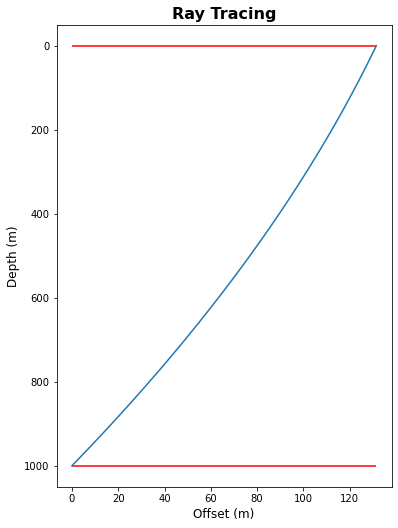

In [452]:
fig, ax = plt.subplots()
for i in range(rays):
    ax.plot(x[:, i], np.flip(dz[:, 0], 0))
ax.set_title("Ray Tracing", fontdict = {'fontsize': 16, 'fontweight': 'bold'})
ax.set_xlabel("Offset (m)", fontdict = {'fontsize': 12, 'fontweight': 'medium'})
ax.set_ylabel("Depth (m)", fontdict = {'fontsize': 12, 'fontweight': 'medium'})
plt.gca().invert_yaxis()
for i in range(len(depth)):
    plt.hlines(depth[i], 0, np.amax(x), colors='r')
fig.set_size_inches(6, 8.5)
plt.show()